# XGBoost

## Importing the libraries

In [45]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

## Importing the dataset

In [46]:
dataset = pd.read_csv('Data.csv')
X = dataset.iloc[:, :-1].values
y = dataset.iloc[:, -1].values

## Splitting the dataset into the Training set and Test set

In [47]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 0)

## Training XGBoost on the Training set

In [48]:
from xgboost import XGBClassifier
from sklearn.preprocessing import LabelEncoder

print(y_train)
le = LabelEncoder()
y_train = le.fit_transform(y_train)
print(y_train)

classifier = XGBClassifier()
classifier.fit(X_train, y_train)

[4 2 2 2 4 2 2 2 2 4 2 4 2 4 4 2 2 2 2 4 4 2 4 4 4 4 4 4 2 2 2 2 2 2 4 4 4
 2 2 2 4 2 2 4 4 2 4 2 2 4 4 2 2 2 2 2 2 2 2 2 2 4 2 2 2 2 2 4 4 2 4 2 2 2
 4 2 2 2 2 4 4 2 2 4 4 2 2 4 4 2 4 2 4 4 2 2 2 4 2 4 2 4 2 2 2 2 2 4 2 2 4
 2 2 4 2 2 2 2 2 4 2 2 4 2 4 2 2 4 4 4 2 2 2 2 2 2 4 4 2 2 2 2 2 2 2 4 2 2
 4 2 2 2 2 2 2 2 4 2 2 2 4 4 2 4 2 2 2 4 2 2 2 4 4 2 4 2 2 4 2 2 2 2 2 2 2
 4 4 4 4 2 4 2 4 2 4 4 4 2 2 4 2 2 2 2 4 4 2 2 2 4 2 2 4 2 2 2 2 4 4 2 2 2
 2 2 2 2 2 2 2 2 4 2 4 2 2 2 2 2 2 4 4 4 4 2 2 4 2 4 2 4 2 2 2 2 4 2 4 2 2
 2 2 4 2 2 4 2 2 2 2 2 2 2 4 2 4 2 2 2 4 2 2 2 2 2 4 2 2 2 2 4 2 2 4 2 2 2
 2 4 4 2 2 2 2 4 2 2 4 2 2 2 2 4 4 2 4 2 4 2 2 2 4 4 4 2 2 2 2 2 2 2 2 4 4
 2 2 2 2 2 2 2 4 4 2 2 2 2 4 4 4 2 4 2 4 2 2 2 2 2 4 2 4 4 2 2 2 2 2 2 2 4
 2 2 2 4 2 2 4 4 4 2 4 4 4 2 2 2 4 2 4 2 2 4 2 4 4 4 2 2 2 4 2 4 4 4 2 2 2
 4 2 4 2 2 2 2 4 4 2 2 2 4 4 2 2 4 2 2 2 4 4 2 2 2 4 2 2 2 4 2 4 2 2 4 2 2
 2 2 4 4 2 2 4 4 2 2 4 4 4 2 2 4 2 2 2 2 2 4 2 4 4 2 2 2 2 4 2 2 2 2 4 2 4
 2 4 2 2 4 2 2 2 2 4 2 2 

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=None, n_jobs=None,
              num_parallel_tree=None, random_state=None, ...)

## Making the Confusion Matrix

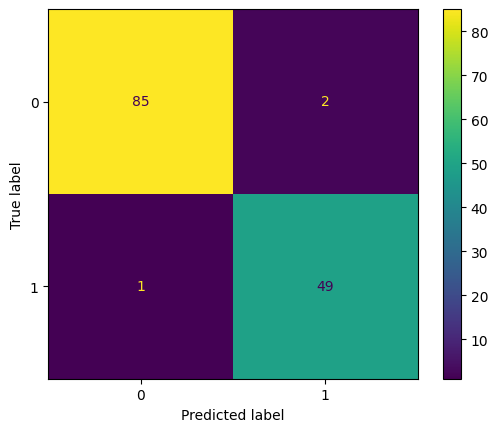

              precision    recall  f1-score   support

           0       0.99      0.98      0.98        87
           1       0.96      0.98      0.97        50

    accuracy                           0.98       137
   macro avg       0.97      0.98      0.98       137
weighted avg       0.98      0.98      0.98       137



In [49]:
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix,  classification_report, ConfusionMatrixDisplay
from sklearn.model_selection import cross_val_score

y_pred = classifier.predict(X_test)
y_test = le.transform(y_test)
confusion_matrix = confusion_matrix(y_test, y_pred)

cm_display = ConfusionMatrixDisplay(confusion_matrix = confusion_matrix)
cm_display.plot()
plt.show()

print(classification_report(y_test, y_pred))

## Applying k-Fold Cross Validation

In [50]:
from sklearn.model_selection import cross_val_score
accuracies = cross_val_score(estimator = classifier, X = X_train, y = y_train, cv = 10)
print("Accuracy: {:.2f} %".format(accuracies.mean() * 100))
print("Standard Deviation: {:.2f} %".format(accuracies.std() * 100))

Accuracy: 96.71 %
Standard Deviation: 2.28 %
